In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import seaborn as sns #for data visulization
import matplotlib.pyplot as plt #for map plotting and chart
%matplotlib inline 

In [4]:
data=pd.read_csv("spam.csv",encoding="latin")
data.head() # to display the first few rows of the DataFrame

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.columns #returns the col names of the dataframe

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"]) #to drop the names of specified coloumns 

In [7]:
data=data.rename(
{
    "v1":"Category",
    "v2":"Message"
},
    axis=1
)

In [8]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.isnull().sum() #to calculate missing values

Category    0
Message     0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
data["Message Length"]=data["Message"].apply(len) # DataFrame data will have a new column called "Message Length" that contains the length of each message in the "Message" column.

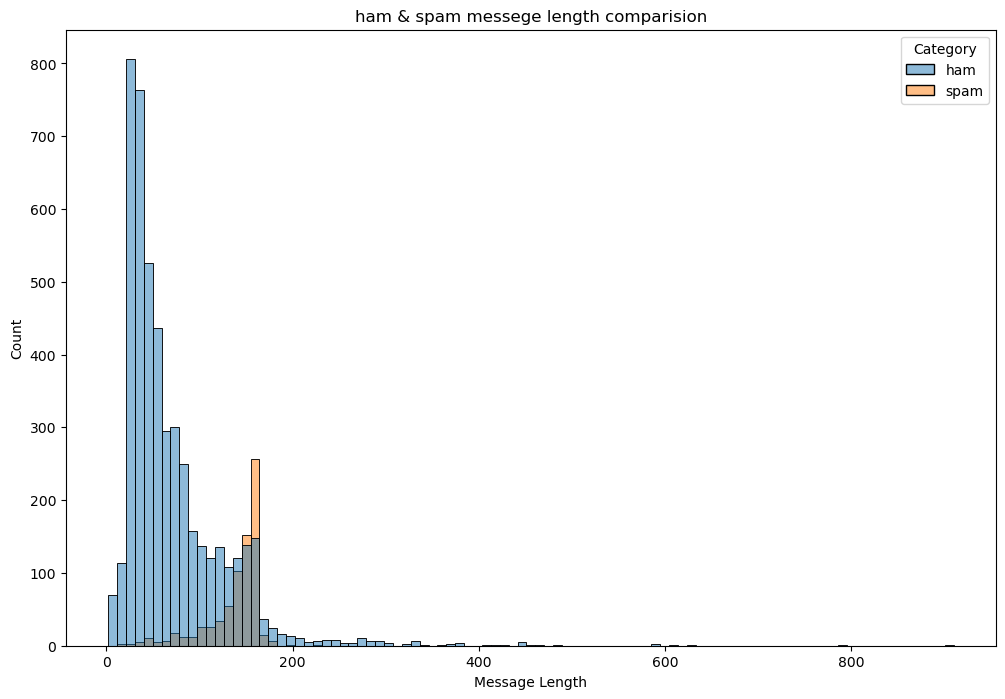

In [12]:
fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=data["Message Length"],
    hue=data["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()
# a histogram plot comparing the message lengths of "ham" and "spam" categories, where the bars represent the
# frequency of message lengths and are grouped by category.

In [13]:
ham_desc=data[data["Category"]=="ham"]["Message Length"].describe()
spam_desc=data[data["Category"]=="spam"]["Message Length"].describe()

print("Ham Messege Length Description:\n",ham_desc)
print("************************************")
print("Spam Message Length Description:\n",spam_desc)
#the descriptive statistics for the message lengths of the "ham" and "spam" categories in the DataFrame data
# Each category will have its own section with information such as count, mean, standard deviation, minimum, maximum, and quartiles.

Ham Messege Length Description:
 count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: Message Length, dtype: float64
************************************
Spam Message Length Description:
 count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: Message Length, dtype: float64


In [14]:
data.describe(include="all")

,Category,Message,Message Length
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.118808
std,NaN,NaN,59.690841
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,61.000000
75%,NaN,NaN,121.000000


In [15]:
data["Category"].value_counts()
#the count of occurrences for each unique value in the "Category" column

ham     4825
spam     747
Name: Category, dtype: int64

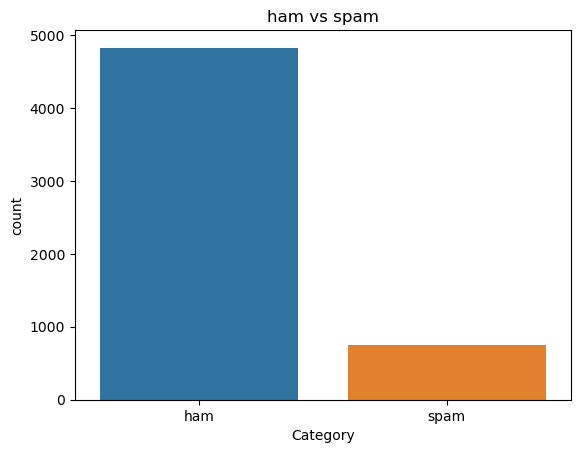

In [16]:
sns.countplot(
    data=data,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [17]:
ham_count=data["Category"].value_counts()[0]
spam_count=data["Category"].value_counts()[1]

total_count=data.shape[0]

print("Ham contains:{:.2f}% of total data.".format(ham_count/total_count*100))
print("Spam conatins:{:.2f}% of total data.".format(spam_count/total_count*100))
#counts total percentage of ham and spam

Ham contains:86.59% of total data.
Spam conatins:13.41% of total data.


In [18]:
#compute the length of majority & minority class
minority_len=len(data[data["Category"]=="spam"])
majority_len=len(data[data["Category"]=="ham"])

#store the indices of majority and minority class
minority_indices=data[data["Category"]=="spam"].index
majority_indices=data[data["Category"]=="ham"].index

#generate new majority indices from the total majority_indices
#with size equal to minority class length so we obtain equivalent number of indices length
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)

#concatenate the two indices to obtain indices of new dataframe
undersampled_indices=np.concatenate([minority_indices,random_majority_indices])

#create df using new indices
df=data.loc[undersampled_indices]

#shuffle the sample
df=df.sample(frac=1)

#reset the index as its all mixed
df=df.reset_index()

#drop the older index
df=df.drop(
    columns=["index"],
)

In [19]:
df.shape

(1494, 3)

In [20]:
df["Category"].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

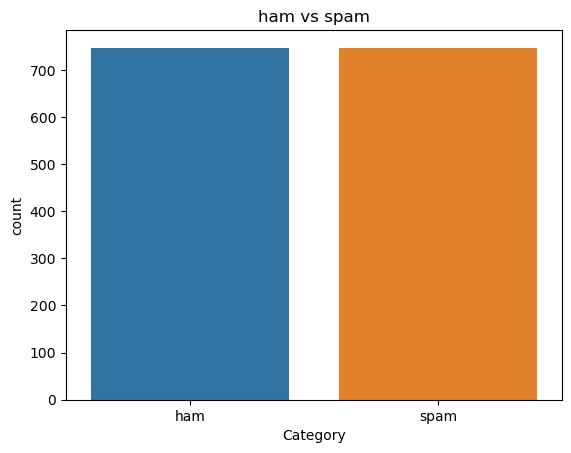

In [21]:
sns.countplot(
    data=df,
    x="Category"
)
plt.title("ham vs spam")
plt.show()


In [22]:
df.head()

,Category,Message,Message Length
0,ham,Ok.,3
1,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å...",158
2,spam,Valentines Day Special! Win over å£1000 in our...,158
3,spam,WIN a year supply of CDs 4 a store of ur choic...,147
4,ham,TELL HER I SAID EAT SHIT.,25


In [23]:
df["Label"]=df["Category"].map(
    {
        "ham":0,
        "spam":1
    }
)

In [24]:
df.head()

,Category,Message,Message Length,Label
0,ham,Ok.,3,0
1,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å...",158,1
2,spam,Valentines Day Special! Win over å£1000 in our...,158,1
3,spam,WIN a year supply of CDs 4 a store of ur choic...,147,1
4,ham,TELL HER I SAID EAT SHIT.,25,0


In [25]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
#declare empty list to store tokenized message
corpus=[]

#iterate through the df["Message"]
for message in df["Message"]:
    
    #replace every special characters, numbers etc.. with whitespace of message
    #It will help retain only letter/alphabets
    message=re.sub("[^a-zA-Z]"," ",message)
    
    #convert every letters to its lowercase
    message=message.lower()
    
    #split the word into individual word list
    message=message.split()
    
    #perform stemming using PorterStemmer for all non-english-stopwords
    message=[stemmer.stem(words)
            for words in message
             if words not in set(stopwords.words("english"))
            ]
    #join the word lists with the whitespace
    message=" ".join(message)
    
    #append the message in corpus list
    corpus.append(message)


In [26]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000

oneHot_doc=[one_hot(words,n=vocab_size)
           for words in corpus
           ]

In [27]:
df["Message Length"].describe()

count    1494.000000
mean      104.474565
std        54.801123
min         2.000000
25%        50.000000
50%       115.500000
75%       153.000000
max       588.000000
Name: Message Length, dtype: float64

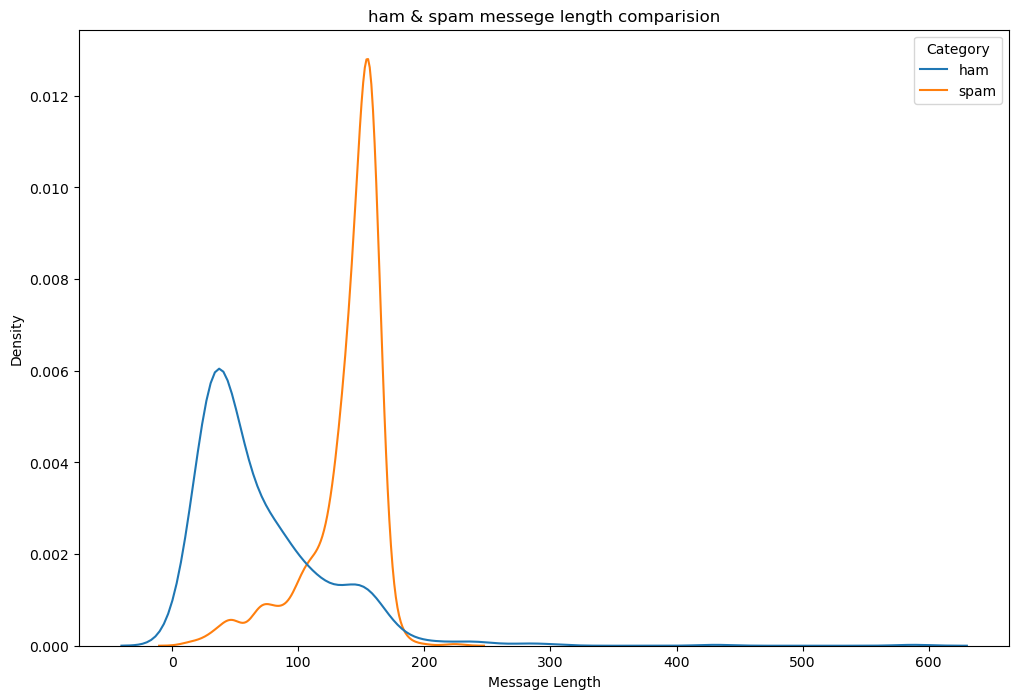

In [28]:
fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=df["Message Length"],
    hue=df["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)


In [30]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=df["Label"]

In [31]:
df_final=pd.concat([extract_features,target],axis=1)

In [32]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9202,0
1,0,0,0,0,0,0,0,0,0,0,...,4003,8152,2379,1478,723,9330,2251,73,8237,1
2,0,0,0,0,0,0,0,0,0,0,...,5328,3476,8382,7526,9731,4623,2599,9141,7047,1
3,0,0,0,0,0,0,0,0,0,0,...,5212,7645,9195,5796,8528,7476,5472,2386,3779,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2758,5724,1787,5118,0


In [33]:
X=df_final.drop("Label",axis=1)
y=df_final["Label"]


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_trainval,X_test,y_trainval,y_test=train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.15
)

In [36]:
X_train,X_val,y_train,y_val=train_test_split(
    X_trainval,
    y_trainval,
    random_state=42,
    test_size=0.15
)

In [37]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

In [38]:
model=Sequential()

In [39]:
feature_num=100
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=feature_num,
        input_length=sentence_len
    )
)
model.add(
    LSTM(
    units=128
    )
)

model.add(
    Dense(
        units=1,
        activation="sigmoid"
    )
)

In [40]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [41]:
model.fit(
    X_train,
    y_train,
    validation_data=(
        X_val,
        y_val
    ),
    epochs=10
)

Epoch 1/10
34/34 [==============================] - 10s 167ms/step - loss: 0.5614 - accuracy: 0.7922 - val_loss: 0.2705 - val_accuracy: 0.9319
Epoch 2/10
34/34 [==============================] - 5s 150ms/step - loss: 0.1810 - accuracy: 0.9406 - val_loss: 0.0960 - val_accuracy: 0.9634
Epoch 3/10
34/34 [==============================] - 5s 153ms/step - loss: 0.0719 - accuracy: 0.9768 - val_loss: 0.0882 - val_accuracy: 0.9738
Epoch 4/10
34/34 [==============================] - 5s 150ms/step - loss: 0.0370 - accuracy: 0.9879 - val_loss: 0.0684 - val_accuracy: 0.9791
Epoch 5/10
34/34 [==============================] - 5s 148ms/step - loss: 0.0216 - accuracy: 0.9926 - val_loss: 0.0718 - val_accuracy: 0.9791
Epoch 6/10
34/34 [==============================] - 5s 148ms/step - loss: 0.0121 - accuracy: 0.9954 - val_loss: 0.1137 - val_accuracy: 0.9791
Epoch 7/10
34/34 [==============================] - 5s 150ms/step - loss: 0.0121 - accuracy: 0.9972 - val_loss: 0.0806 - val_accuracy: 0.9791
Epoch

In [42]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

8/8 [==============================] - 1s 41ms/step


In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [44]:
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

Test Score:96.00%


array([[112,   2],
       [  7, 104]], dtype=int64)

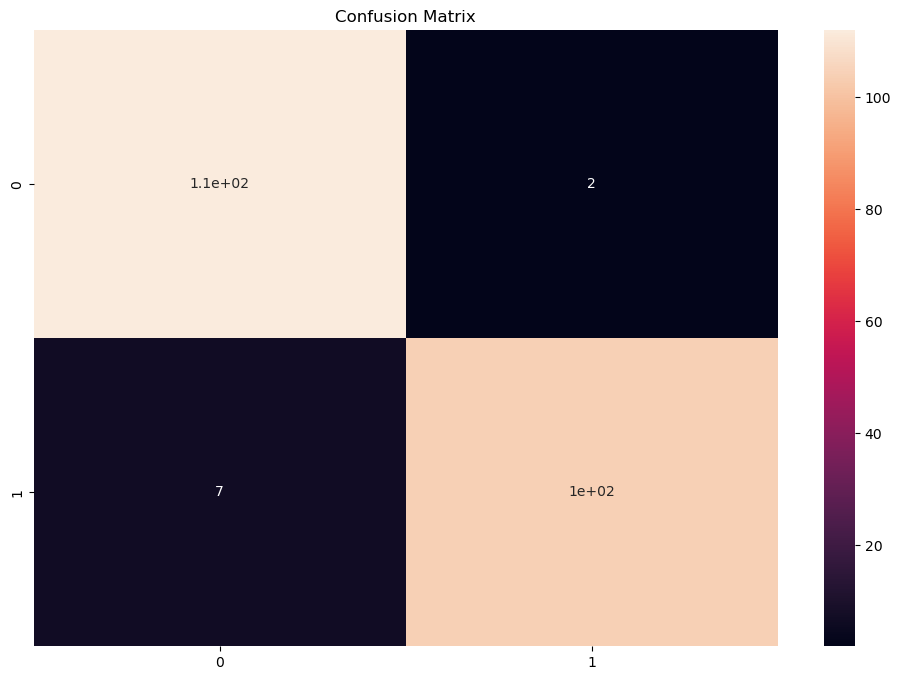

In [45]:
cm=confusion_matrix(y_test,y_pred)
fig=plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm

In [46]:
#The function take model and message as parameter
def classify_message(model,message):
    
    #We will treat message as a paragraphs containing multiple sentences(lines)
    #we will extract individual lines
    for sentences in message:
        sentences=nltk.sent_tokenize(message)
        
        #Iterate over individual sentences
        for sentence in sentences:
            #replace all special characters
            words=re.sub("[^a-zA-Z]"," ",sentence)
            
            #perform word tokenization of all non-english-stopwords
            if words not in set(stopwords.words('english')):
                word=nltk.word_tokenize(words)
                word=" ".join(word)
    
    #perform one_hot on tokenized word            
    oneHot=[one_hot(word,n=vocab_size)]
    
    #create an embedded documnet using pad_sequences 
    #this can be fed to our model
    text=pad_sequences(oneHot,maxlen=sentence_len,padding="pre")
    
    #predict the text using model
    predict=model.predict(text)
    
    #if predict value is greater than 0.5 its a spam
    if predict>0.5:
        print("It is a spam")
    #else the message is not a spam    
    else:
        print("It is not a spam")

In [48]:
message1 = "I am having a bad day and I would like to have a break today"
message2 = "This is to inform you that you won a lottery and the subscription will end in a week, so call us."
message3 = "Hi! Nitesh here"

# Calling the function with the model and messages
classify_message(model, message1)
classify_message(model, message2)
classify_message(model, message3)

1/1 [==============================] - 0s 17ms/step
It is not a spam
1/1 [==============================] - 0s 27ms/step
It is a spam
1/1 [==============================] - 0s 26ms/step
It is not a spam
